In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
#declare base 
Base = automap_base()

# reflect an existing database into a new model

Base.prepare(autoload_with=engine)

# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine) 

In [9]:
#Display columns for Measurement table 
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date = dt.date(2017, 8, 23)
print(recent_date)

2017-08-23


In [11]:
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.

year_ago = recent_date - dt.timedelta(days=365)
print(year_ago)


2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
raw_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= recent_date).filter(Measurement.date >= year_ago).all()

In [13]:

# Save the query results as a Pandas DataFrame. Explicitly set the column names
perc_df = pd.DataFrame(raw_data, columns=['Date', 'Precipitation Levels'])


In [14]:

# Sort the dataframe by date
perc_df= perc_df.sort_values("Date").reset_index(drop=True)
perc_df.head()

,Date,Precipitation Levels
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15


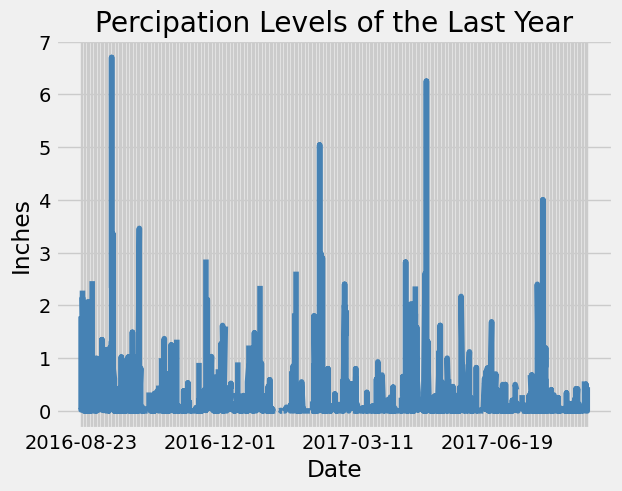

In [15]:

# Use Pandas Plotting with Matplotlib to plot the data

date = perc_df['Date']
perc = perc_df['Precipitation Levels']

fig, ax = plt.subplots()
ax.plot(date, perc, color = 'steelblue')

#Display only every 100th date 
n = 100 
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

ax.set_xlabel("Date",)
ax.set_ylabel('Inches')
plt.title('Percipation Levels of the Last Year')

plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = perc_df['Precipitation Levels'].describe()
print(summary_stats)


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation Levels, dtype: float64


# Exploratory Station Analysis

In [17]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
# Design a query to calculate the total number of stations in the dataset

station_amount = session.query(func.count(Station.id)).all()

print(station_amount)

[(9,)]


In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.id)).\
group_by(Measurement.station).\
order_by(func.count (Measurement.id).desc()).all()
print(most_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps =[Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

most_active_temps = session.query(*temps).filter(Measurement.station == 'USC00519281').all()
most_active_temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 

station_temps = session.query(Measurement.date, Measurement.tobs, Measurement.station).\
    filter(Measurement.date <= recent_date).\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.station=='USC00519281').\
    order_by(Measurement.date.desc()).all()




In [24]:
#Save query results as a Pandas Dataframe 

temp_df = pd.DataFrame(station_temps, columns=['Date', 'Temperature', 'Station_ID'])
temp_df

,Date,Temperature,Station_ID
0,2017-08-18,79.0,USC00519281
1,2017-08-17,76.0,USC00519281
2,2017-08-16,76.0,USC00519281
3,2017-08-15,77.0,USC00519281
4,2017-08-14,77.0,USC00519281
...,...,...,...
347,2016-08-27,75.0,USC00519281
348,2016-08-26,80.0,USC00519281
349,2016-08-25,80.0,USC00519281
350,2016-08-24,77.0,USC00519281


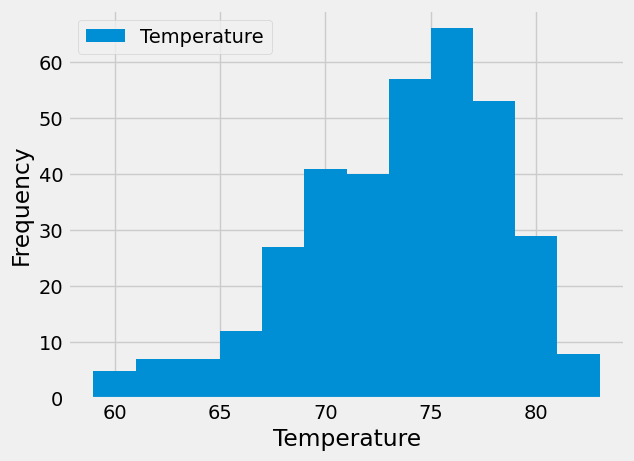

In [25]:
#Display Results as a Histogram 

temp_df['Temperature'].plot(kind='hist' ,bins=12, legend=True) 
plt.xlabel('Temperature')
plt.show()

# Close Session

In [ ]:
session.close()